11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.3426 - val_loss: 0.1665
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1585 - val_loss: 0.1342
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1325 - val_loss: 0.1231
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1225 - val_loss: 0.1173
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1172 - val_loss: 0.1120
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1124 - val_loss: 0.1081
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1085 - val_loss: 0.1049
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1057 - val_loss: 0.1022
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1028 - val_loss: 0.1005
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1009 - val_loss: 0.0989
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0993 - val_loss: 0.0980


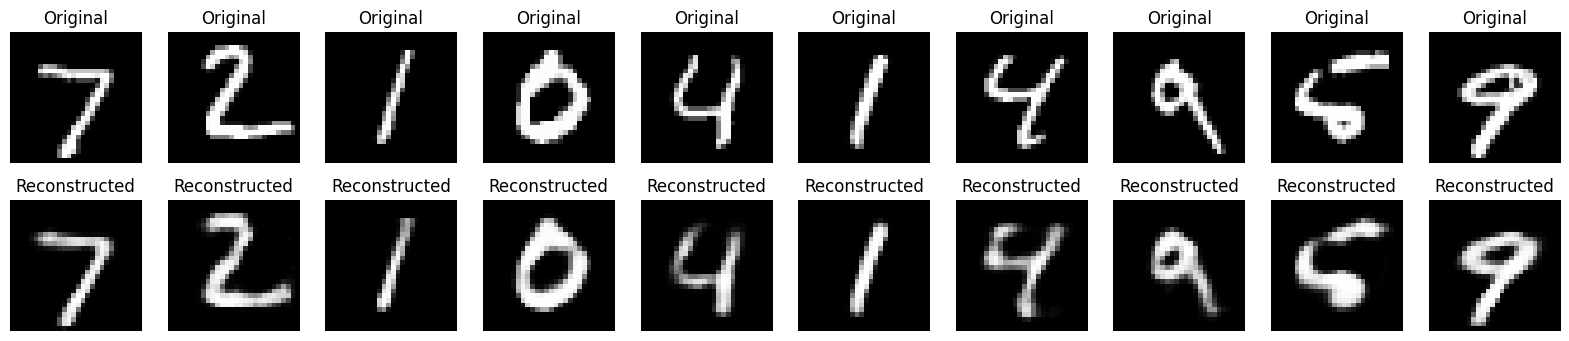

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# 1. Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# 2. Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# 3. Define the Autoencoder architecture
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# 4. Build the autoencoder model
autoencoder = Model(input_img, decoded)

# 5. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 6. Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 7. Predict (reconstruct) on test data
decoded_imgs = autoencoder.predict(x_test)

# 8. Visualize original vs reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
